In [325]:
%matplotlib inline

In [326]:
import astra
import numpy as np
import pylab as plt
import os
import glob

import matplotlib
font = {'size'   : 18}
matplotlib.rc('font', **font)

In [327]:
from scipy.signal import medfilt

In [328]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = unicode(index or '?')

In [329]:
def images_diff(im1, im2):
    assert(im1.shape==im2.shape)
    rec_diff = np.zeros(shape=(im1.shape[0],im1.shape[1],3), dtype='float32')
    im1_t = im1.copy()
    im1_t = (im1_t-im1_t.min())/(im1_t.max()-im1_t.min())
    
    im2_t = im2.copy()
    im2_t = (im2_t-im2_t.min())/(im2_t.max()-im2_t.min())
    
    # nrecon_rec_t[nrecon_rec_t<0] = 0
    diff_rec = im1_t-im2_t
    rec_diff[...,0] = diff_rec*(diff_rec>0)
    rec_diff[...,1] = -diff_rec*(diff_rec<0)
    rec_diff[...,2] = rec_diff[...,1]
    return rec_diff

In [6]:
data_root = '/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_0/'
nrecon_root_folder = os.path.join(data_root,'_tmp','nrecon')
nrecon_folders = glob.glob(os.path.join(nrecon_root_folder, '*'))
nrecon_folders = [nf for nf in nrecon_folders if os.path.isdir(nf)]
print len(nrecon_folders)

0


In [330]:
def get_data(folder):
    data_file = glob.glob(os.path.join(folder, '*_sino0980.tif'))[0]
#     print(data_file)
    sinogram = plt.imread(data_file).astype('float32')
    data_file = glob.glob(os.path.join(folder, '*_sinoraw_0980.tif'))[0]
    sinraw = plt.imread(data_file).astype('float32')
    rec_file = glob.glob(os.path.join(folder, '*_rec0980.png'))[0]
    rec = plt.imread(rec_file).astype('float32')
    return sinogram, sinraw, rec

In [331]:
!ls /home/makov/Downloads/nrecon/mmc_1/NO_TS/

BH_0_RC_0   BH_0_RC_12	BH_0_RC_17  BH_0_RC_22	BH_0_RC_30
BH_0_RC_1   BH_0_RC_15	BH_0_RC_2   BH_0_RC_25	BH_0_RC_5
BH_0_RC_10  BH_0_RC_16	BH_0_RC_20  BH_0_RC_3


In [9]:
sino0, sinraw0, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_0/')
sino1, sinraw1, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_1/')
sino2, sinraw2, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_2/')
sino3, sinraw3, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_3/')
sino5, sinraw5, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_5/')
sino10, sinraw10, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_10/')
sino12, sinraw12, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_12/')
sino15, sinraw15, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_15/')
sino16, sinraw16, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_16/')
sino17, sinraw17, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_17/')
sino20, sinraw20, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_20/')
sino22, sinraw22, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_22/')
sino25, sinraw25, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_25/')
sino30, sinraw30, _ = get_data('/home/makov/Downloads/nrecon/mmc_1/NO_TS/BH_0_RC_30/')

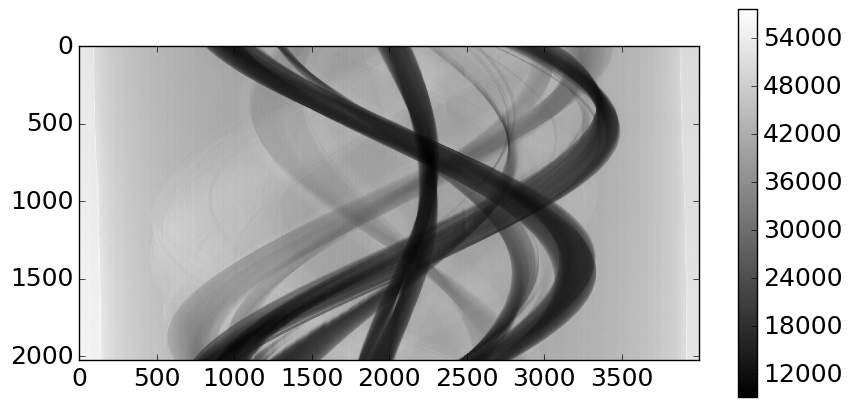

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(sinraw0, cmap=plt.cm.gray, interpolation='nearest')
plt.colorbar(orientation='vertical')

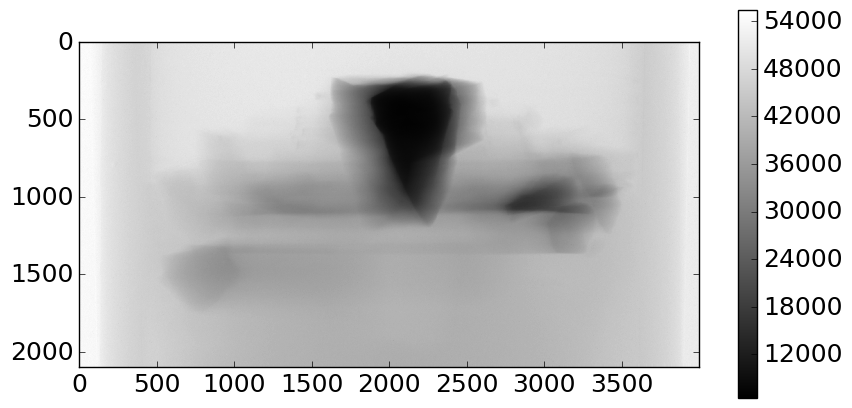

In [11]:
plt.figure(figsize=(10,5))
arc = plt.imread('/diskmnt/a/makov/yaivan/MMC_1/Raw/MMC1_2.82um__arc.tif').astype('float32')
plt.imshow(arc, cmap=plt.cm.gray, interpolation='nearest')
plt.colorbar(orientation='vertical')

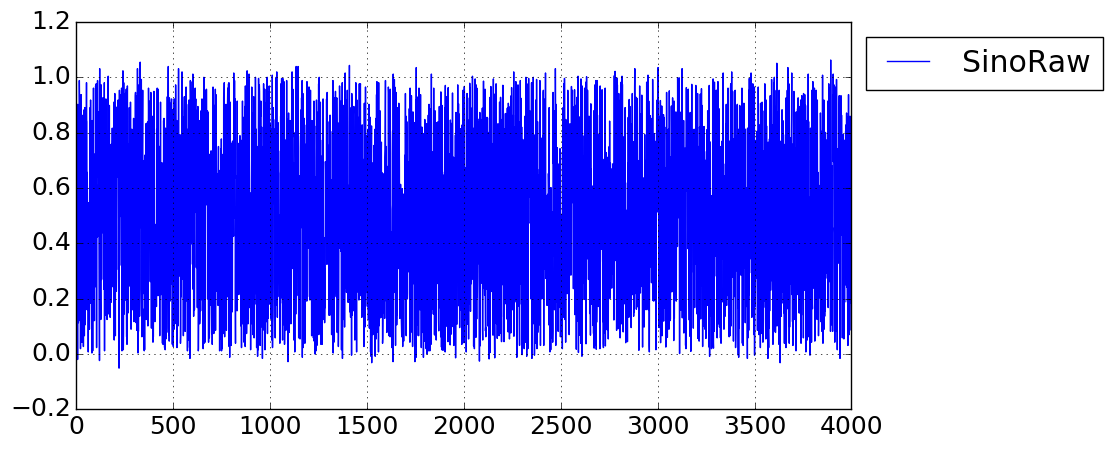

In [13]:
plt.figure(figsize=(10,5))
# plt.plot(arc[-961],label='Arc')
plt.plot(np.mean(sinraw10, axis=0)-arc[-981],label='SinoRaw')
plt.grid(True)
plt.legend(loc=0,bbox_to_anchor=[1.0, 1.0])

In [147]:
print((np.mean(sinraw10, axis=0)-arc[-961])[2000])

0.279297


In [12]:
from collections import OrderedDict
sinograms = OrderedDict()
sinograms['0']=sino0
sinograms['1']=sino1
sinograms['2']=sino2
sinograms['3']=sino3
sinograms['5']=sino5
sinograms['10']=sino10
sinograms['12']=sino12
sinograms['15']=sino15
sinograms['16']=sino16
sinograms['17']=sino17
sinograms['20']=sino20
sinograms['22']=sino22
sinograms['25']=sino25
sinograms['30']=sino30

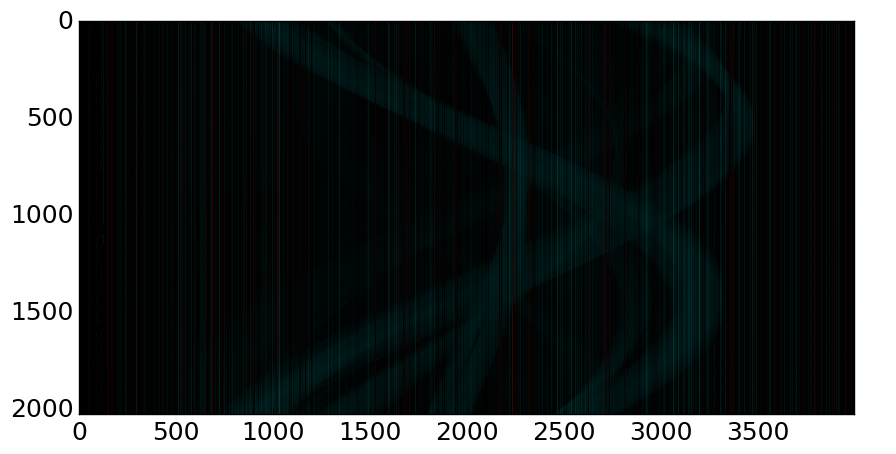

In [13]:
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(sino0, sino1))

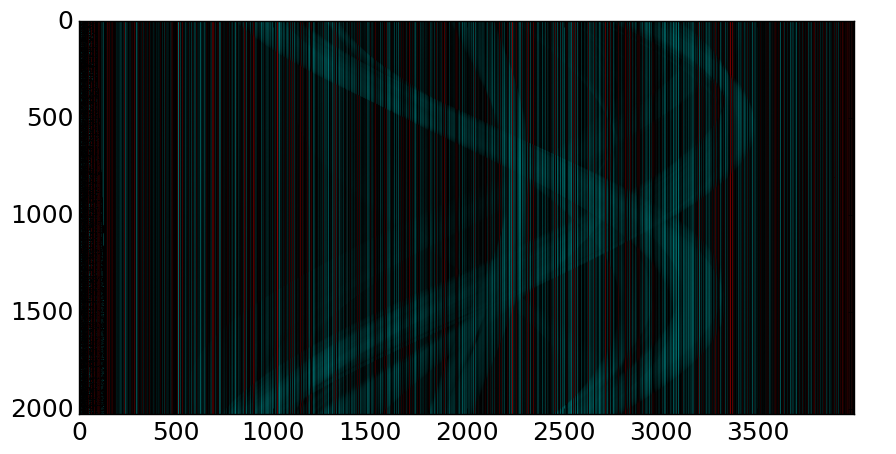

In [14]:
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(sino0, sino3))

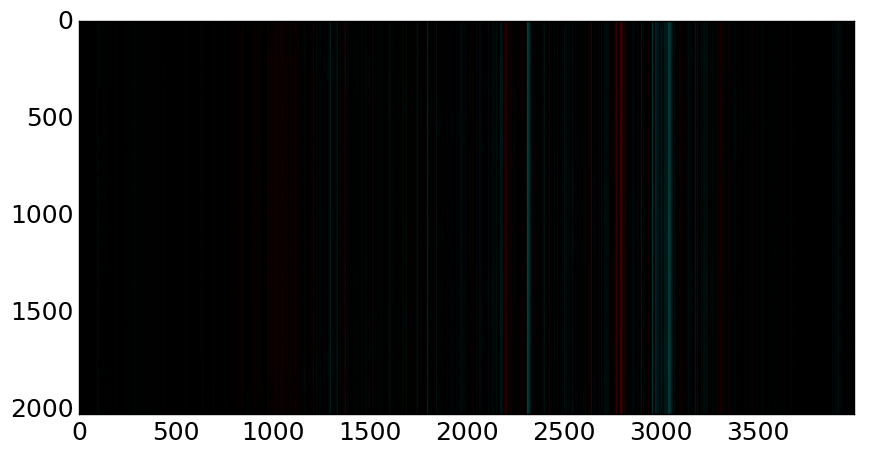

In [15]:
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(sino15, sino17))

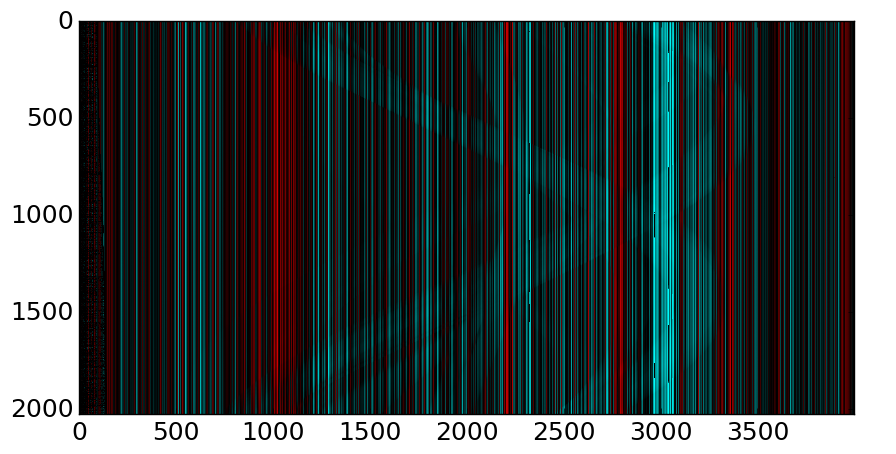

In [16]:
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(sino0, sino20))

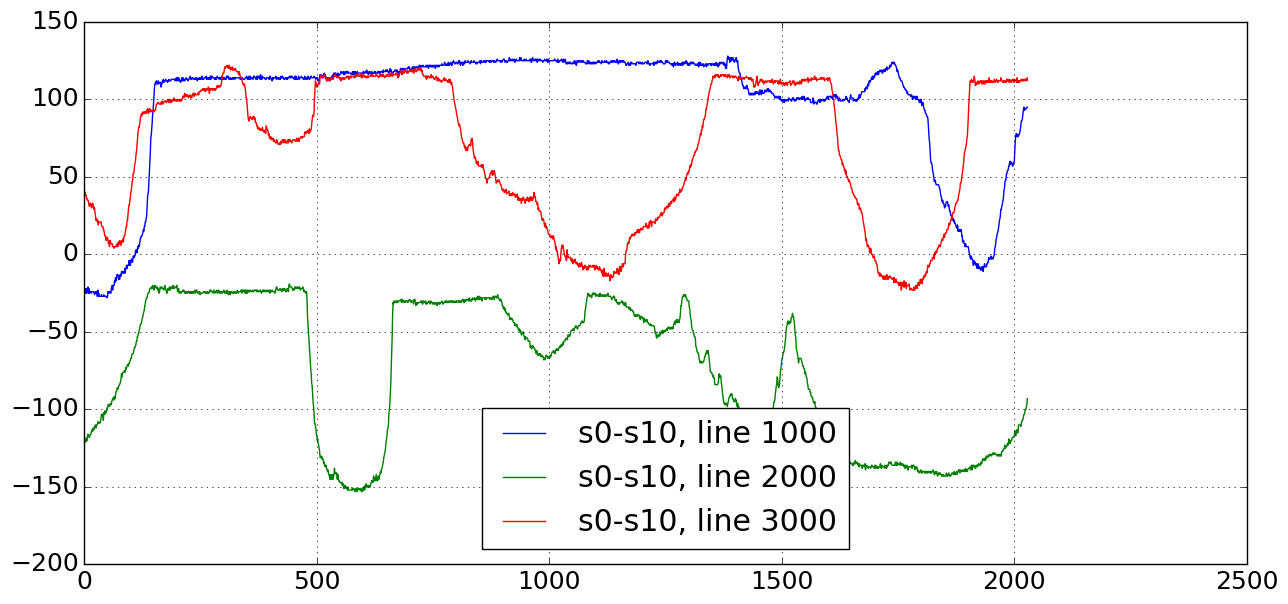

In [30]:
s0=sinograms['0']
# sf = median_filter(sinogram0,[1,3]).sum(axis=0)
s10=sinograms['10']
plt.figure(figsize=(15,7))
# plt.plot(s0, label='s0')
# plt.plot(s10, label='s10')
plt.plot((s0[:,1000]-s10[:,1000]), label='s0-s10, line 1000')
plt.plot((s0[:,2000]-s10[:,2000]), label='s0-s10, line 2000')
plt.plot((s0[:,3000]-s10[:,3000]), label='s0-s10, line 3000')
# plt.plot(100*(sf-s10), label='s0-sf')
plt.grid(True)
plt.legend(loc=0)

In [22]:
s0=sinograms['0']
# sf = median_filter(sinogram0,[1,3]).sum(axis=0)
s1=sinograms['1']
s3=sinograms['3']
s5=sinograms['5']
s10=sinograms['10']
s15=sinograms['15']
s17=sinograms['17']
s20=sinograms['20']
d0=s0[:,2000]
d1=s1[:,2000]-d0
d3=s3[:,2000]-d0
d5=s5[:,2000]-d0
d10=s10[:,2000]-d0
d15=s15[:,2000]-d0
d17=s17[:,2000]-d0
d20=s20[:,2000]-d0

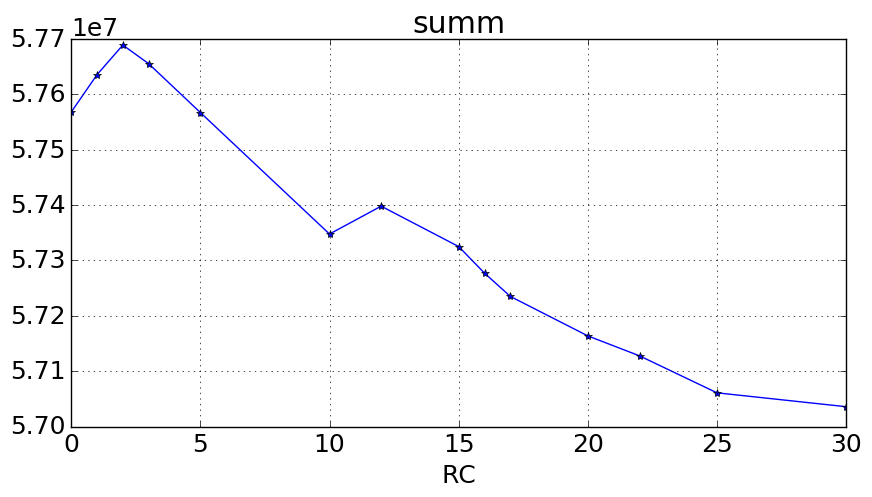

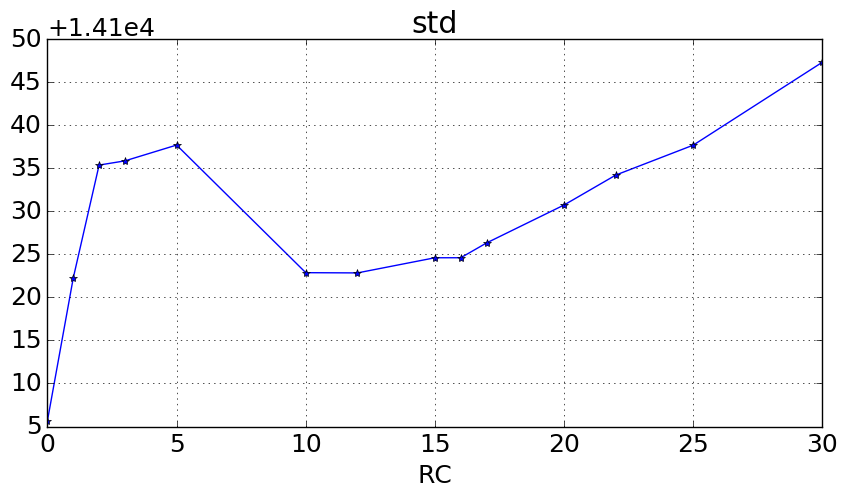

In [23]:
std=[]
summ = []
x = []
for k in sinograms.keys():
    data = sinograms[k][:,3100]
    x.append(np.int(k))
    std.append(np.std(data))
    summ.append(np.sum(data))
    
plt.figure(figsize=(10,5))
plt.plot(x,summ,'*-')
plt.title('summ')
plt.xlabel('RC')
plt.grid(True)
plt.legend(loc=0,bbox_to_anchor=[1.0, 1.0])

plt.figure(figsize=(10,5))
plt.plot(x,std,'*-')
plt.title('std')
plt.xlabel('RC')
plt.grid(True)
plt.legend(loc=0,bbox_to_anchor=[1.0, 1.0])

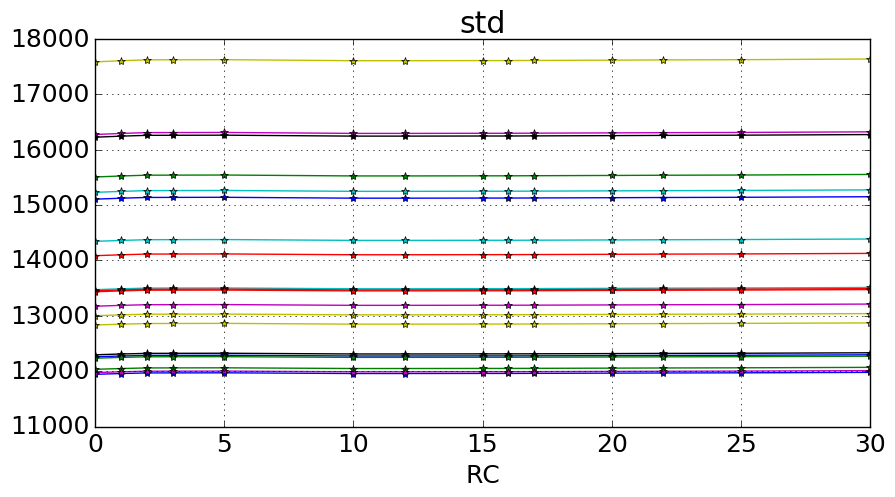

In [24]:
plt.figure(figsize=(10,5))
for r in range(1000,3000,100):
    std=[]
    summ = []
    x = []
    for k in sinograms.keys():
        data = sinograms[k][:,r]
        x.append(np.int(k))
        std.append(np.std(data))
#         summ.append(np.sum(data))
    plt.plot(x,std,'*-', label=r)

plt.title('std')
plt.xlabel('RC')
plt.grid(True)
# plt.legend(loc=0,bbox_to_anchor=[1.0, 1.0])

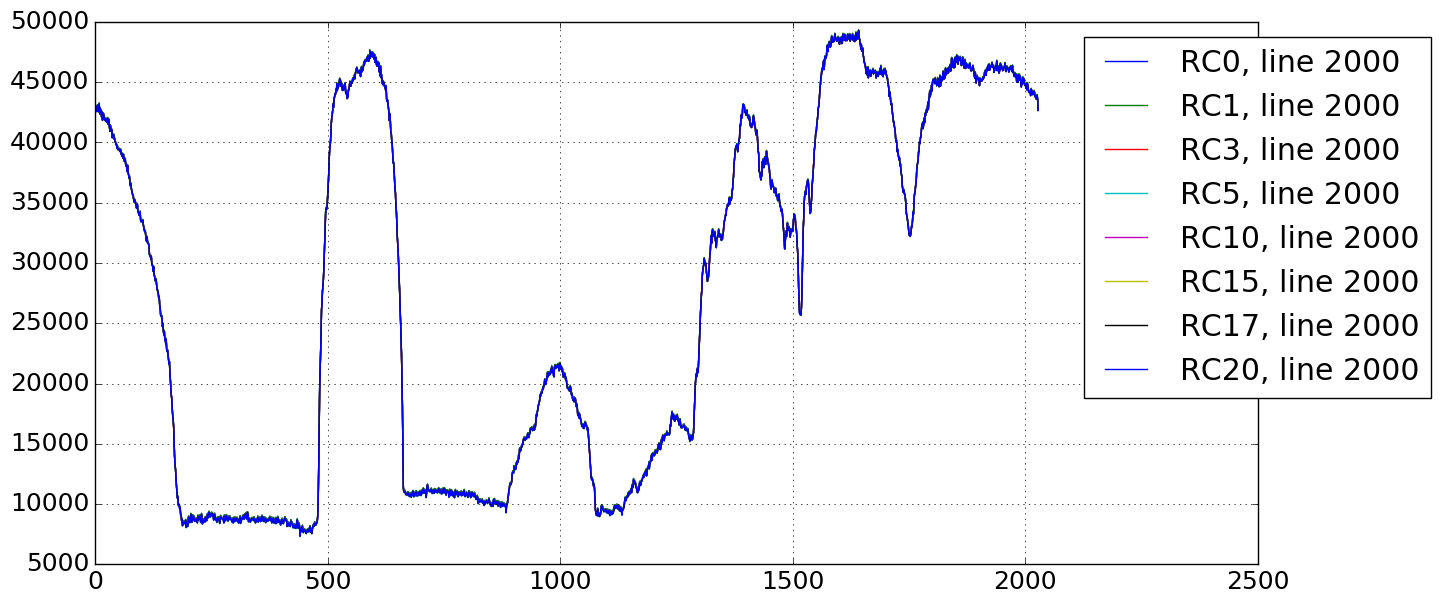

In [25]:
plt.figure(figsize=(15,7))
# plt.plot(s0, label='s0')
# plt.plot(s10, label='s10')
plt.plot(s0[:,2000], label='RC0, line 2000')
plt.plot(s1[:,2000], label='RC1, line 2000')
plt.plot(s3[:,2000], label='RC3, line 2000')
plt.plot(s5[:,2000], label='RC5, line 2000')
plt.plot(s10[:,2000], label='RC10, line 2000')
plt.plot(s15[:,2000], label='RC15, line 2000')
plt.plot(s17[:,2000], label='RC17, line 2000')
plt.plot(s20[:,2000], label='RC20, line 2000')
# plt.plot((s10[:,2000]-s20[:,2000]), label='s10-s20, line 2000')
# plt.plot((s0[:,3000]-s10[:,3000]), label='s0-s10, line 3000')
# plt.plot(100*(sf-s10), label='s0-sf')
plt.grid(True)
plt.legend(loc=9,bbox_to_anchor=[1.0, 1.0])

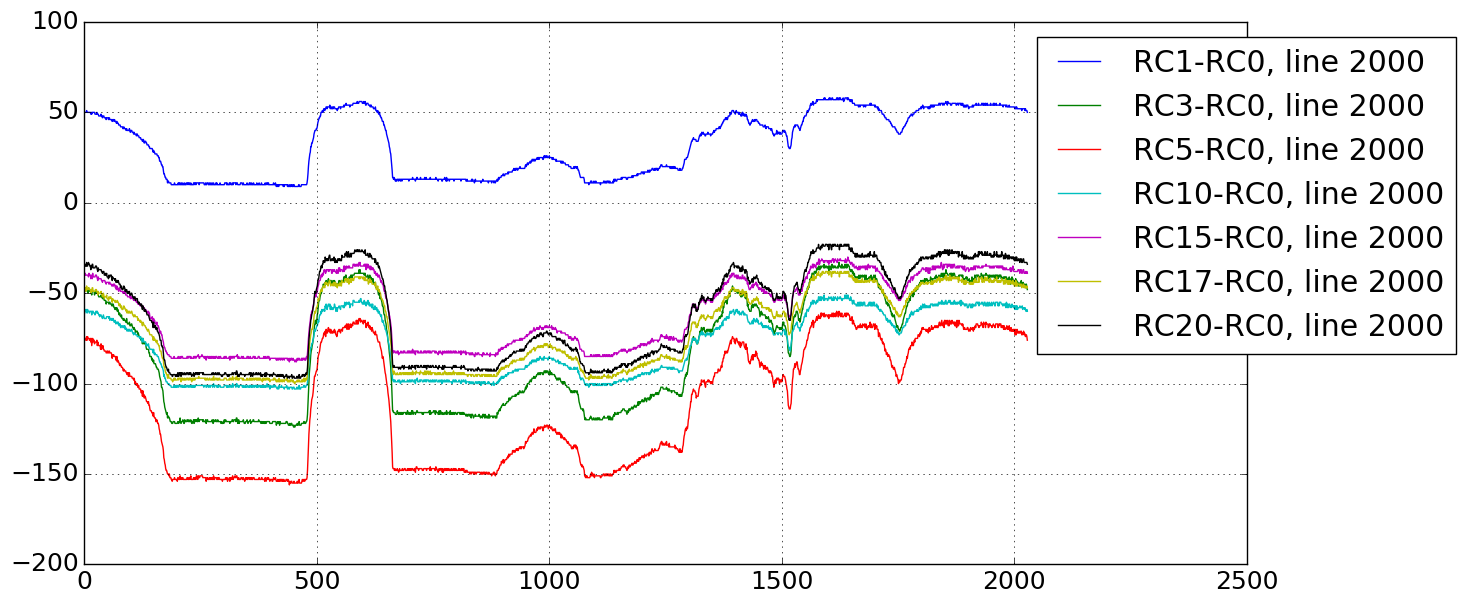

In [26]:
plt.figure(figsize=(15,7))
# plt.plot(s0, label='s0')
# plt.plot(s10, label='s10')
# plt.plot((d0/1e2), label='0.01*RC=0, line 2000')
plt.plot(d1, label='RC1-RC0, line 2000')
plt.plot(d3, label='RC3-RC0, line 2000')
plt.plot(d5, label='RC5-RC0, line 2000')
plt.plot(d10, label='RC10-RC0, line 2000')
plt.plot(d15, label='RC15-RC0, line 2000')
plt.plot(d17, label='RC17-RC0, line 2000')
plt.plot(d20, label='RC20-RC0, line 2000')
# plt.plot((s10[:,2000]-s20[:,2000]), label='s10-s20, line 2000')
# plt.plot((s0[:,3000]-s10[:,3000]), label='s0-s10, line 3000')
# plt.plot(100*(sf-s10), label='s0-sf')
plt.grid(True)
plt.legend(loc=9,bbox_to_anchor=[1.0, 1.0])

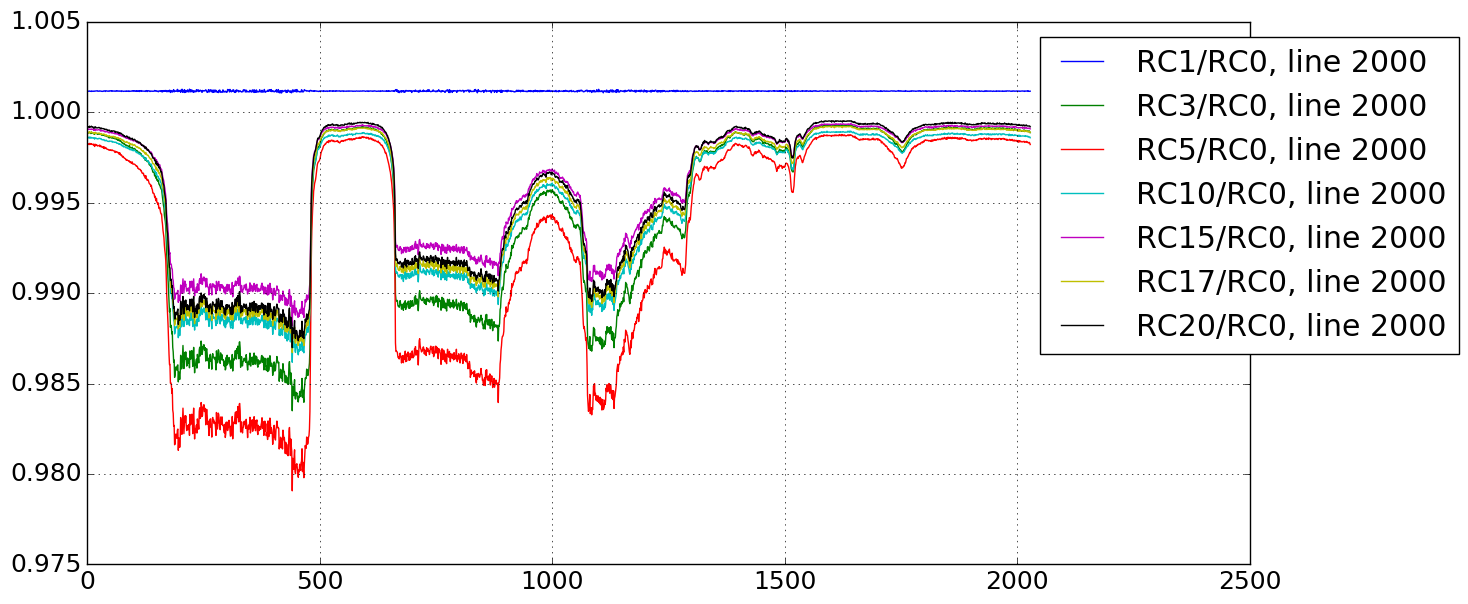

In [27]:

plt.figure(figsize=(15,7))
# plt.plot(s0, label='s0')
# plt.plot(s10, label='s10')
# plt.plot((s0[:,2000]/1e2), label='0.01*RC=0, line 2000')
plt.plot(d1/d0+1, label='RC1/RC0, line 2000')
plt.plot(d3/d0+1, label='RC3/RC0, line 2000')
plt.plot(d5/d0+1, label='RC5/RC0, line 2000')
plt.plot(d10/d0+1, label='RC10/RC0, line 2000')
plt.plot(d15/d0+1, label='RC15/RC0, line 2000')
plt.plot(d17/d0+1, label='RC17/RC0, line 2000')
plt.plot(d20/d0+1, label='RC20/RC0, line 2000')
# plt.plot((s10[:,2000]-s20[:,2000]), label='s10-s20, line 2000')
# plt.plot((s0[:,3000]-s10[:,3000]), label='s0-s10, line 3000')
# plt.plot(100*(sf-s10), label='s0-sf')
plt.grid(True)
plt.legend(loc=9,bbox_to_anchor=[1.0, 1.0])

In [28]:
from scipy.optimize import curve_fit

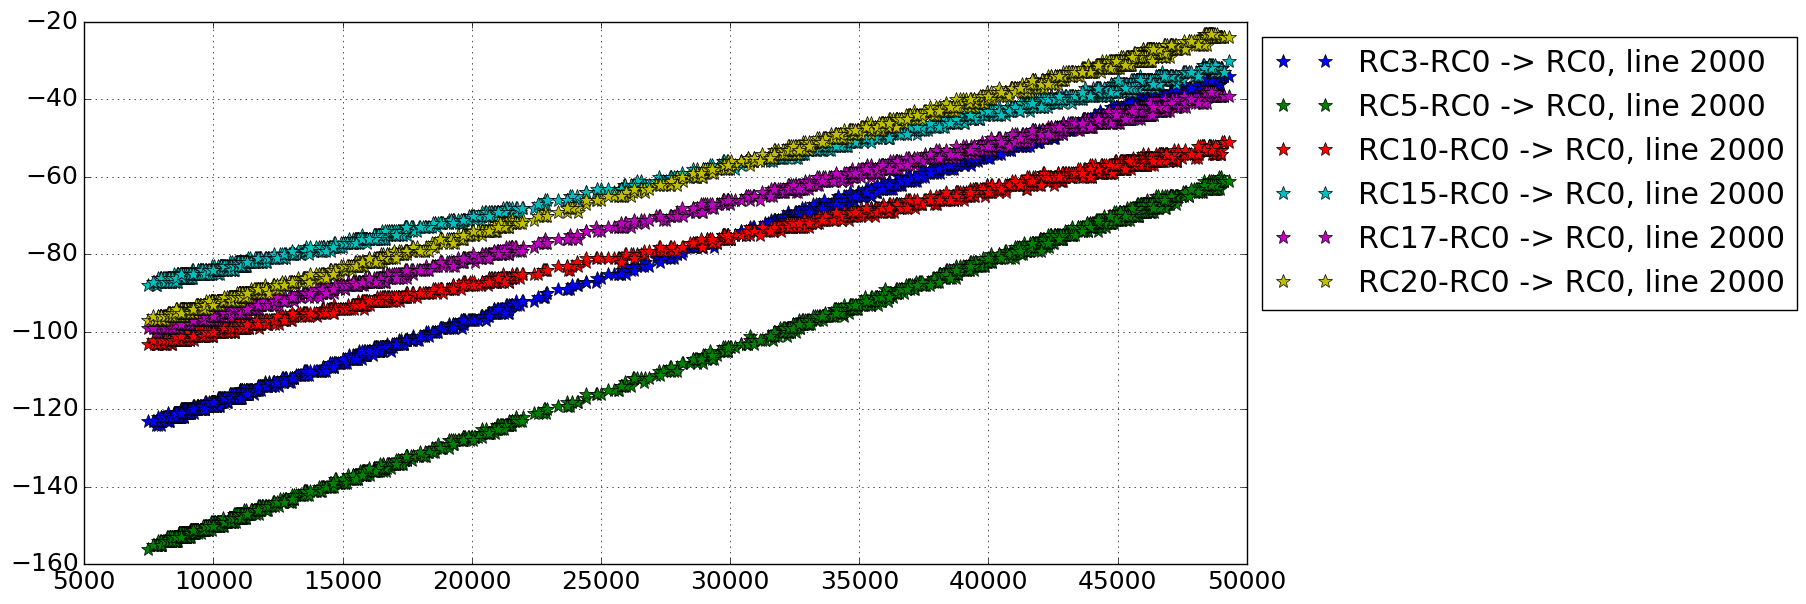

In [29]:

plt.figure(figsize=(15,7))
# plt.plot(s0, label='s0')
# plt.plot(s10, label='s10')
# plt.plot((s0[:,2000]/1e2), label='0.01*RC=0, line 2000')
# plt.plot(d1,d0,'*', label='RC1/RC0, line 2000')
plt.plot(d0,d3, '*', label='RC3-RC0 -> RC0, line 2000', markersize=10)
plt.plot(d0,d5, '*', label='RC5-RC0 -> RC0, line 2000', markersize=10)
plt.plot(d0,d10, '*', label='RC10-RC0 -> RC0, line 2000', markersize=10)
plt.plot(d0,d15, '*', label='RC15-RC0 -> RC0, line 2000', markersize=10)
plt.plot(d0,d17, '*', label='RC17-RC0 -> RC0, line 2000', markersize=10)
plt.plot(d0,d20, '*', label='RC20-RC0 -> RC0, line 2000', markersize=10)
# plt.plot((s10[:,2000]-s20[:,2000]), label='s10-s20, line 2000')
# plt.plot((s0[:,3000]-s10[:,3000]), label='s0-s10, line, 3000')
# plt.plot(100*(sf-s10), label='s0-sf')
plt.grid(True)
plt.legend(loc=0,bbox_to_anchor=[1.0, 1.0])

In [30]:
def f(x,a,b):
    return a*x+b

a  = {}
b = {}
a_err = {}
b_err = {}
for k in log_progress(sorted(sinograms.keys())):
    if k == '0':
        continue
    s0 = sinograms['0']
    sk = sinograms[k]
    
    a[k] =[]
    b[k] =[]
    a_err[k] = []
    b_err[k] = []
    for px in log_progress(range(s0.shape[1])):
        popt, pcov = curve_fit(f, s0[:,px],(sk-s0)[:,px])
        perr  = np.sqrt(np.diag(pcov))
        a[k].append(popt[0])
        b[k].append(popt[1])
        a_err[k].append(perr[0])
        b_err[k].append(perr[1])

/home/makov/opt/anaconda/envs/astra-dbg/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


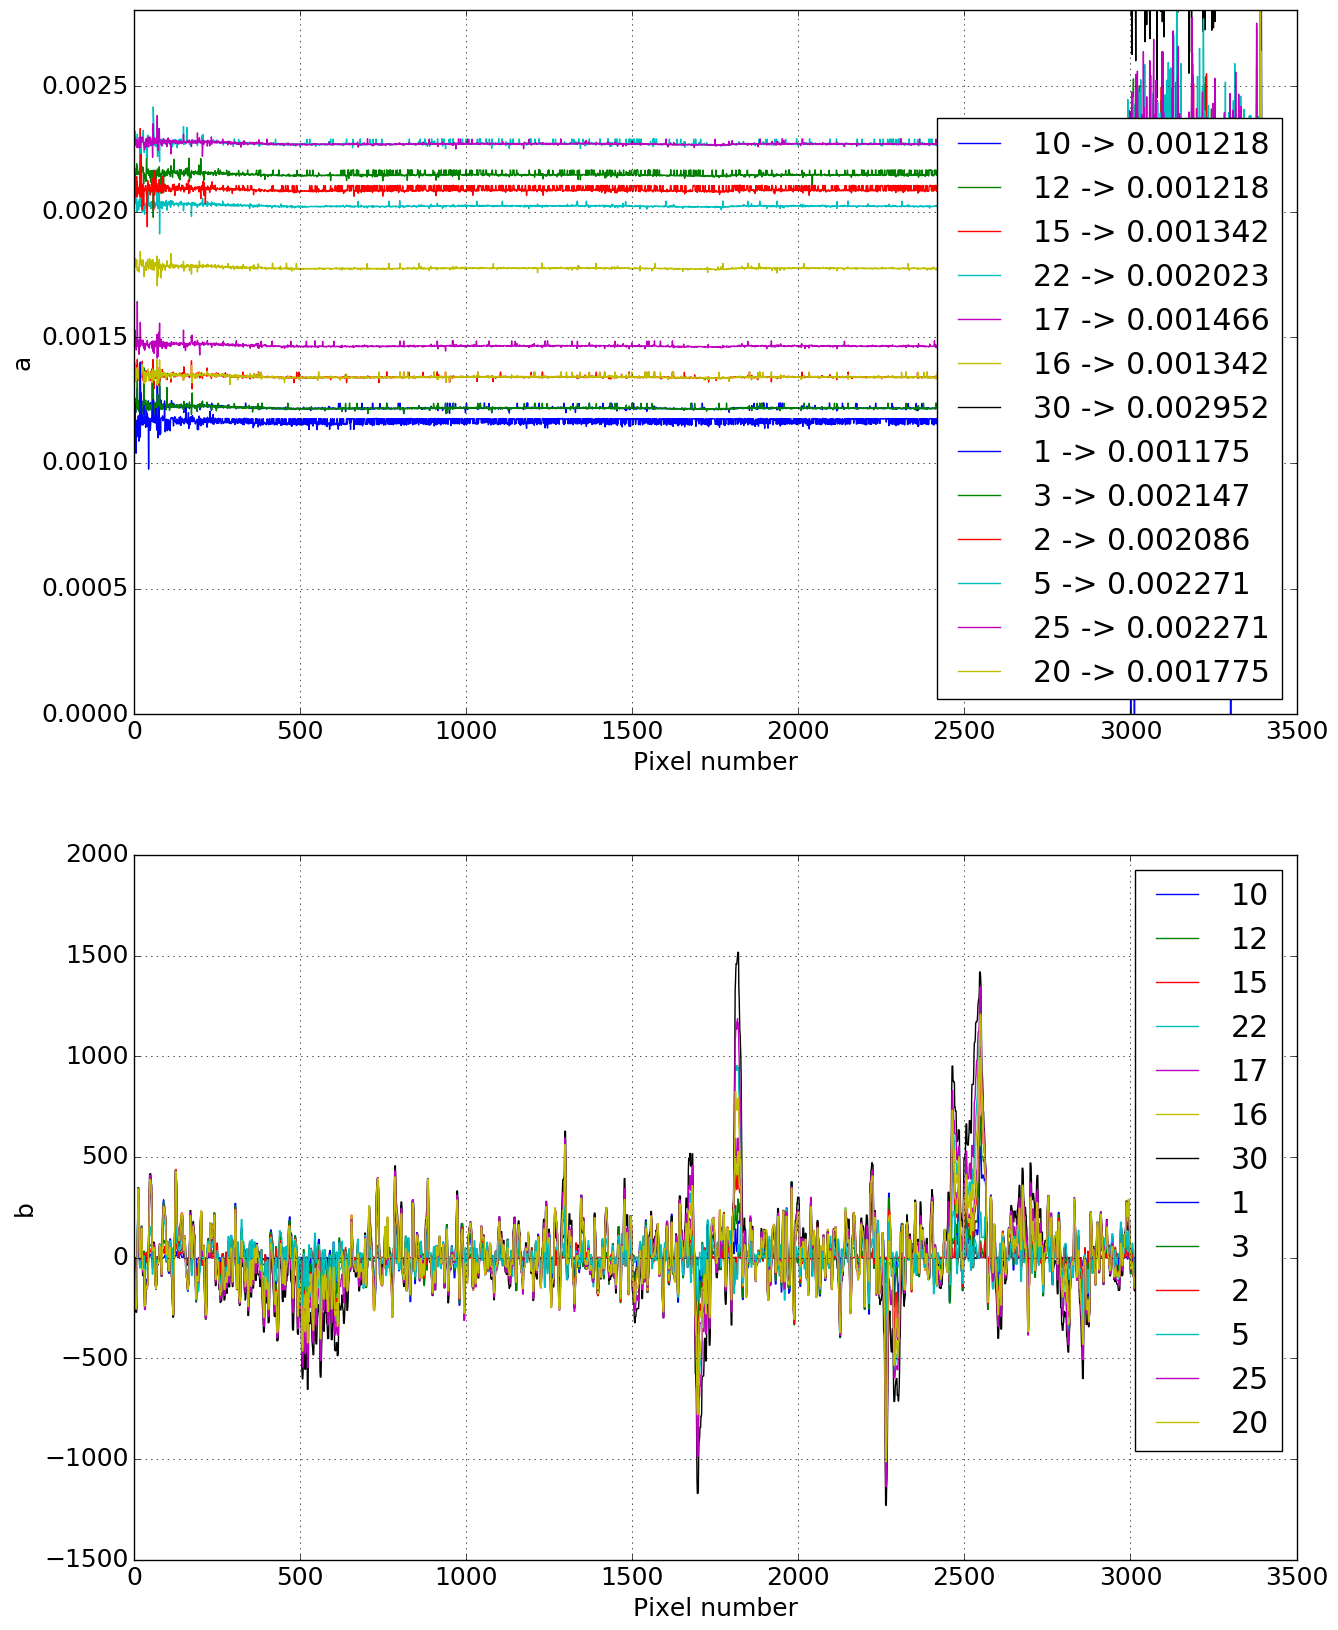

In [31]:
plt.figure(figsize=(15,20))
plt.title('y=ax+b')

for k in a.keys():
    ya = a[k][500:-100]
    yb = b[k][500:-100]
    ya_err = a_err[k][500:-100]
    yb_err = b_err[k][500:-100]
    x = range(len(ya))
    
    plt.subplot(211)
    plt.plot(x,ya,'-', markersize=10, label='{} -> {:05f}'.format(k, np.median(ya)))
    plt.ylim([0,max(ya)])
#     plt.errorbar(x,ya,yerr=ya_err,linestyle="None")
    plt.grid(True)
    plt.xlabel('Pixel number')
    plt.ylabel('a')
    plt.legend(loc=0)
    plt.subplot(212)
    plt.plot(x,medfilt(yb,5),'-', markersize=10, label=k)
#     plt.errorbar(x,yb,yerr=yb_err,linestyle="None")
    plt.grid(True)
    plt.xlabel('Pixel number')
    plt.ylabel('b')
    plt.legend(loc=0)
plt.show()

In [156]:
data = [(np.int(k),np.median(a[k])) for k in a.keys()]
data = np.asarray(data)
plt.figure(figsize=(14,10))
plt.plot(data[:,0], data[:,1],'*', markersize='15')
plt.title('a from RC-level')
plt.xlabel('RC level')
plt.ylabel('a')
plt.grid(True)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

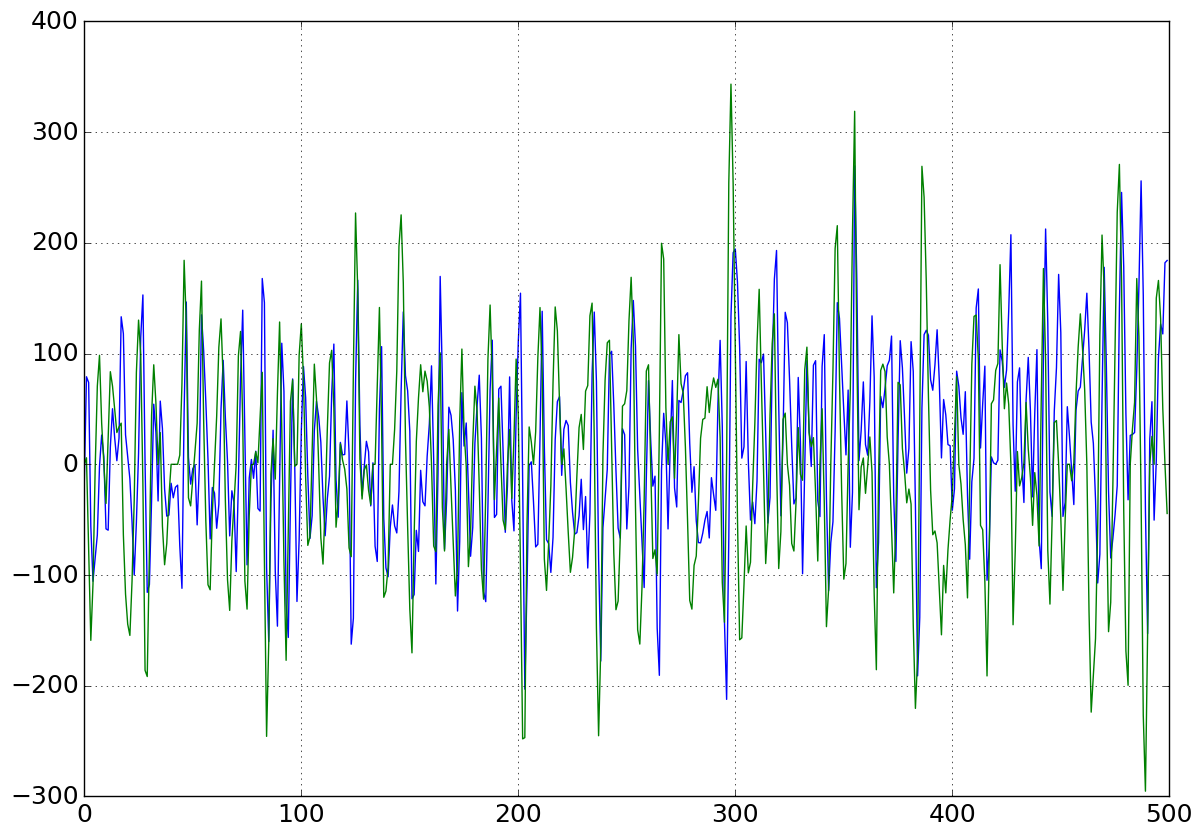

In [33]:
arccc = np.mean(sino0, axis=0)[500:-100]
plt.figure(figsize=(14,10))
plt.plot(np.diff(arccc)[1000:1500])
# plt.plot(x,np.cumsum(yb))
plt.plot(b['5'][500:-100][1000:1500])
plt.grid(True)

In [38]:
import scipy.signal
import scipy.ndimage

In [277]:
def log_sinogram(sino):
    '''
    This function convert NRecon sinogram_raw to sinogram.
    Searchin cut threshold, calculate log and change range to 0 ... 65535. 
    
    Inputs:
      sino - 2D raw sinogram
    '''
    tmp_sino = sino.copy()  # make copy for inplace corrections
    tmp_sino[tmp_sino==0]=0.1
    k1 = tmp_sino[:,1:11].mean(axis=-1) # left range
    k2 = tmp_sino[:,-12:-2].mean(axis=-1) # right range
    trh = np.maximum(k1,k2)  # cut threshold
    for i in range(tmp_sino.shape[0]):  # нормируем каждую строку
        t=tmp_sino[i]  # указатель на строку
        t[t>trh[i]]=trh[i]  # обрезаем по верхнему порогу 
        t/=trh[i]  # нормируем строку перед логрифмированием
    
    tmp_sino = -np.log(tmp_sino)
    tmp_sino = tmp_sino/tmp_sino.max()*65535  # переходим в диапазон 0...65535
    return tmp_sino

In [295]:
def get_my_b(level):
    t= np.mean(sino0, axis=0)
    gt = scipy.ndimage.filters.gaussian_filter1d(t,level/2, truncate=4.)
    return gt-t

def get_my_b2(level):
    t= arc[-981]
    gt = scipy.ndimage.filters.gaussian_filter(arc,level/2.)[-981]
    return t-gt

def get_nrecon_b(level):
    return b[str(level)]

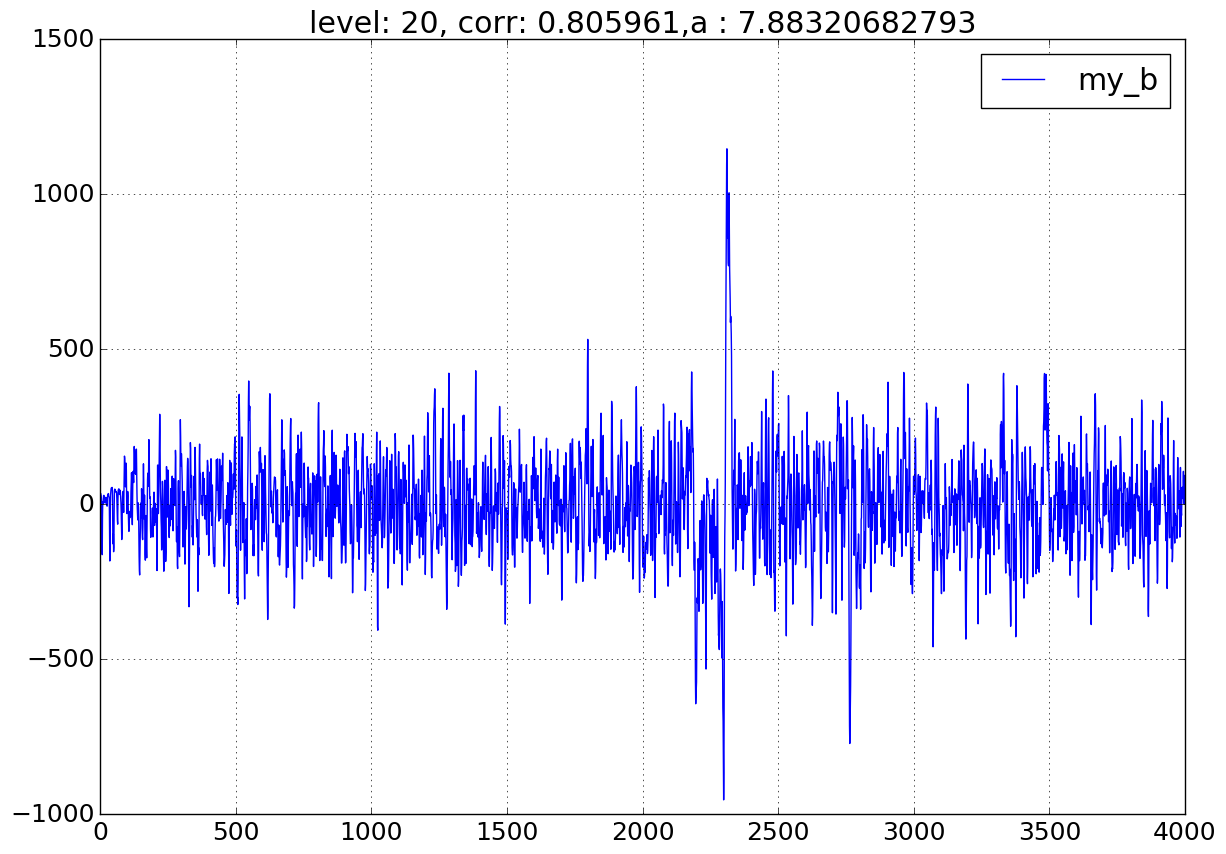

In [333]:
level = 20
my_b = get_my_b(level)#[2000:2500]
nrecon_b = get_nrecon_b(level)#[2000:2500]
arccc = np.mean(sino0, axis=0)#[2000:2500]
plt.figure(figsize=(14,10))
# plt.plot((2*arccc[1:-1]-arccc[0:-2]-arccc[2:])[1000:1100])
# plt.plot(np.diff(arccc[1:])[1000:1100], label='diff mean')
# plt.plot(my_b-nrecon_b, label='my_b-nrecon_b')
# plt.plot((arccc-np.mean(arccc))/10, label='arccc')
plt.plot(my_b, label='my_b')
# plt.plot(nrecon_b, label='nrecon b')
plt.legend(loc=0)
plt.title('level: {}, corr: {:03f},a : {}'.format(level,
                    np.correlate(my_b,nrecon_b)[0]/np.linalg.norm(my_b)/np.linalg.norm(nrecon_b),
                                                 np.sum(nrecon_b-my_b)/len(my_b)
                                                 )
         )
plt.grid(True)
# plt.figure(figsize=(14,10))
# t_arccc = scipy.ndimage.filters.gaussian_filter1d(arccc,level/2, truncate=4.)
# t_arccc = np.diff(t_arccc)
# plt.plot((nrecon_b-my_b)[:-1], label='nrecon_b-my_b')
# plt.plot(-t_arccc, label='t_arccc')

plt.grid(True)

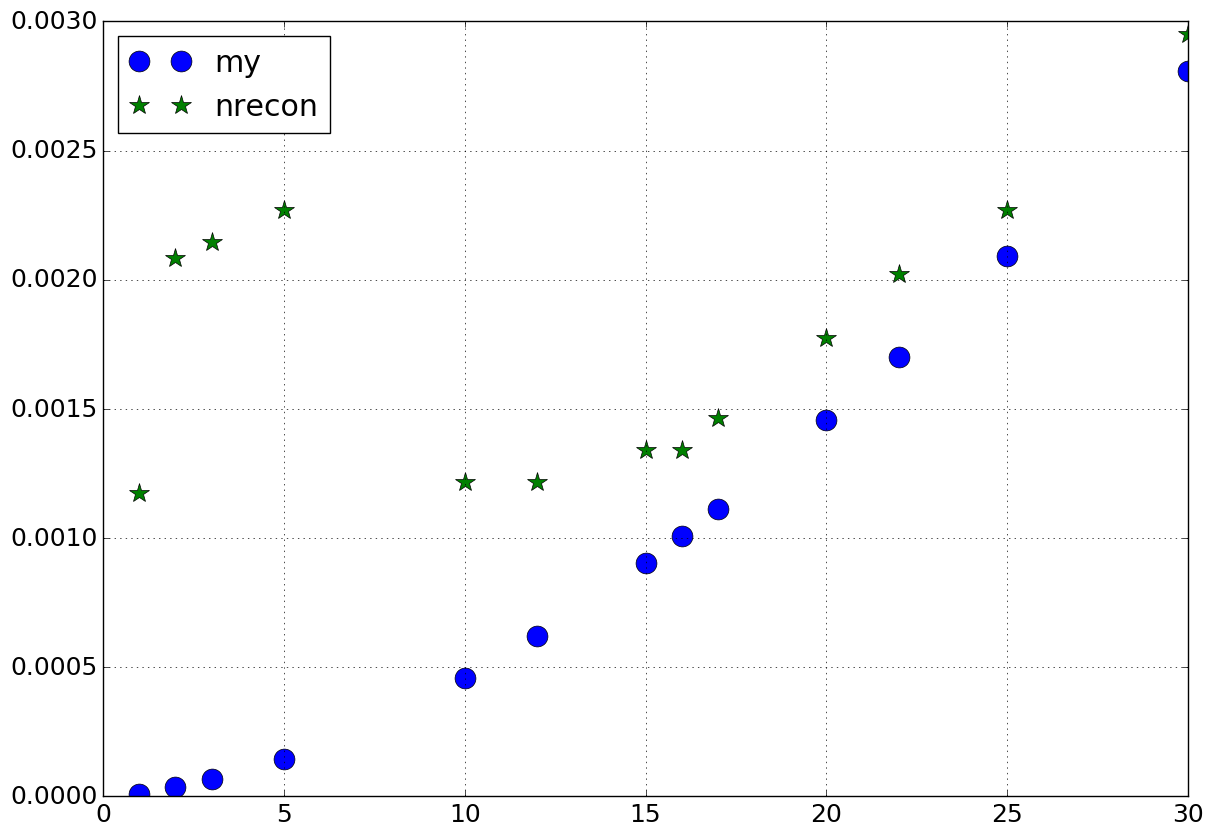

In [199]:
a=[]
ll = []
t= np.mean(sino0, axis=0)[1200:2000]
for l in sorted(b.keys()):
    level=int(l)
    my_b = get_my_b(level)[1200:2000]
    nrecon_b = get_nrecon_b(level)[1200:2000]
    ta=np.mean(my_b)
    a.append(ta)
    ll.append(level)

a = np.asanyarray(a)/4000
ll = np.asanyarray(ll)


plt.figure(figsize=(14,10))
plt.plot(ll,a,'o', markersize='15', label='my')
plt.plot(data[:,0], data[:,1],'*', markersize='15', label='nrecon')
plt.legend(loc=0)
plt.grid(True)

In [318]:
def my_rc(sino0, level):
    def get_my_b(level):
        t= np.mean(sino0, axis=0)
        gt = scipy.ndimage.filters.gaussian_filter1d(t,level/2.)
        return gt-t
    
    def get_my_a(level):
        my_b = get_my_b(level)
        return np.mean(my_b)/4000
    
    my_a = get_my_a(level)
    my_b = get_my_b(level)
    
    res = sino0.copy()
    if not level==0:
        res+= sino0*my_a+my_b
    
    return res

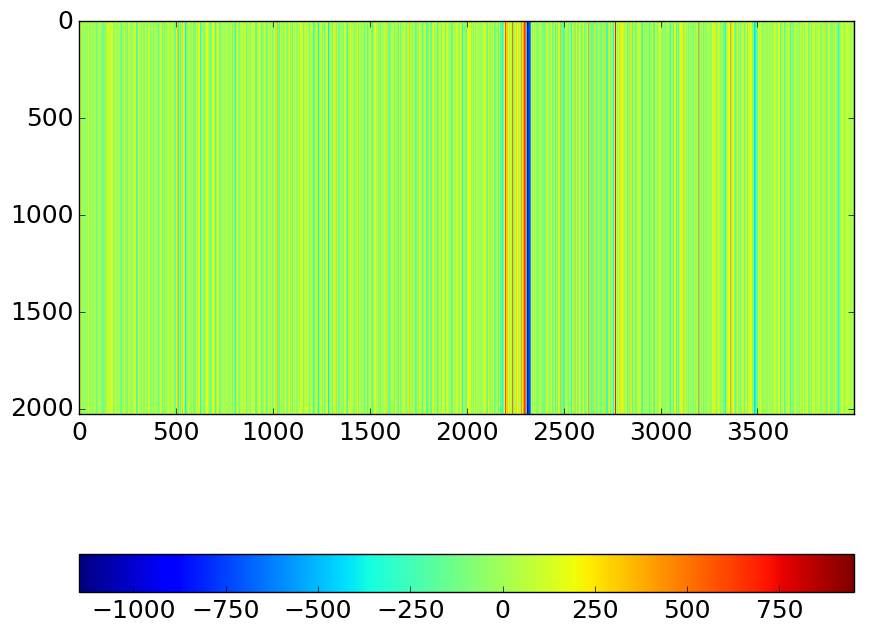

In [334]:
plt.figure(figsize=(10,12))
plt.imshow(sino0-my_rc(sino0, 20))
plt.colorbar(orientation='horizontal')

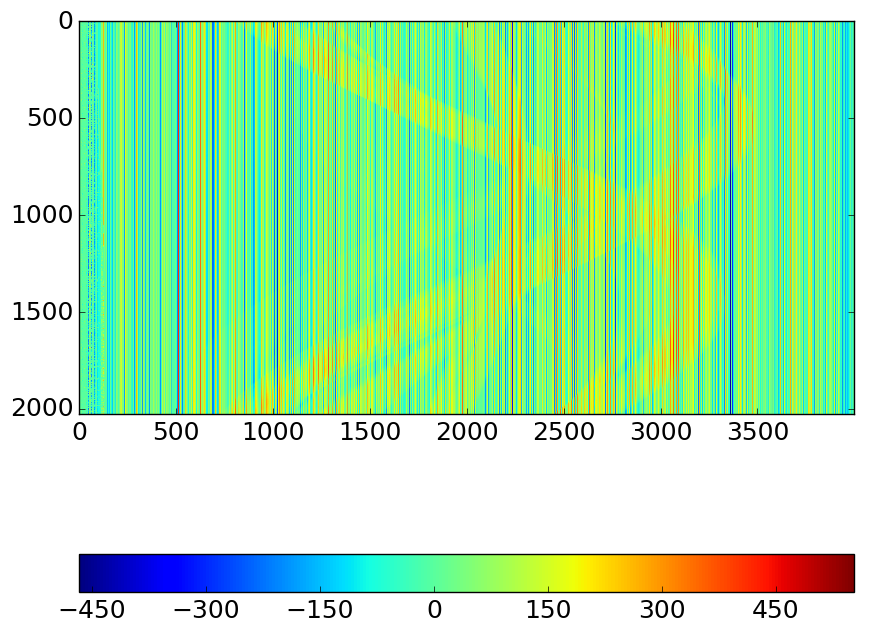

In [335]:
plt.figure(figsize=(10,12))
plt.imshow(sino5-sino0)
plt.colorbar(orientation='horizontal')

In [172]:
np.sum(sino0[:])-np.sum(sino1[:])

-1.475625e+08

In [200]:
sino0.shape

(2029, 4000)

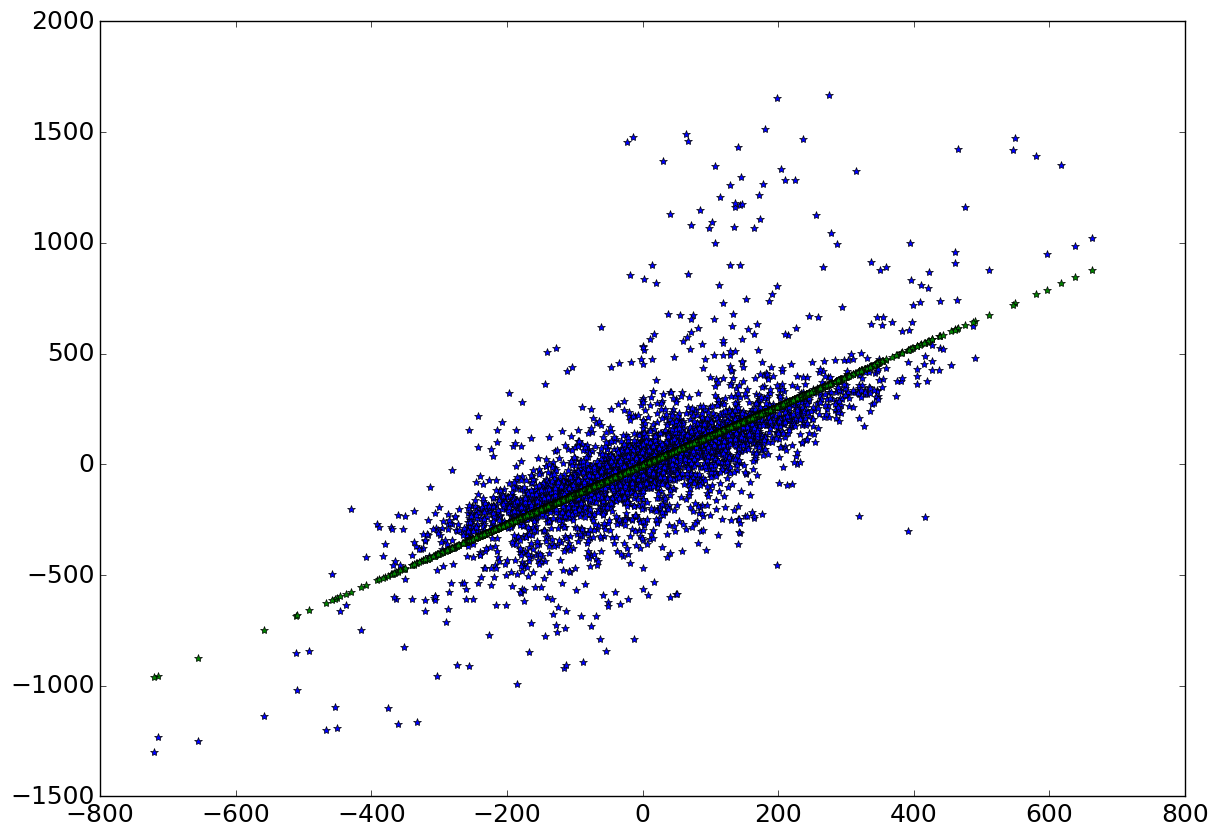

[ 1.32990926 -4.13822431]
[ 0.02044869  2.93606003]


In [89]:
plt.figure(figsize=(14,10))
x = b['10']
# x = np.diff(arcc[1:])
y = b['30']
popt, pcov = curve_fit(f, x,y)
perr  = np.sqrt(np.diag(pcov))
plt.plot(x,y,'*')
plt.plot(x,f(np.asarray(x),popt[0], popt[1]),'*')
# plt.plot(b['10'],b['20'],'*')
plt.show()
print(popt)
print(perr)

In [92]:
x = np.diff(arcc[1:])
y = b['10'][:-2]
np.correlate(x,y)/np.linalg.norm(x)/np.linalg.norm(y)

array([ 0.47945043])

[ 0.09280284  0.32666391]
[ 0.01217288  0.05551511]


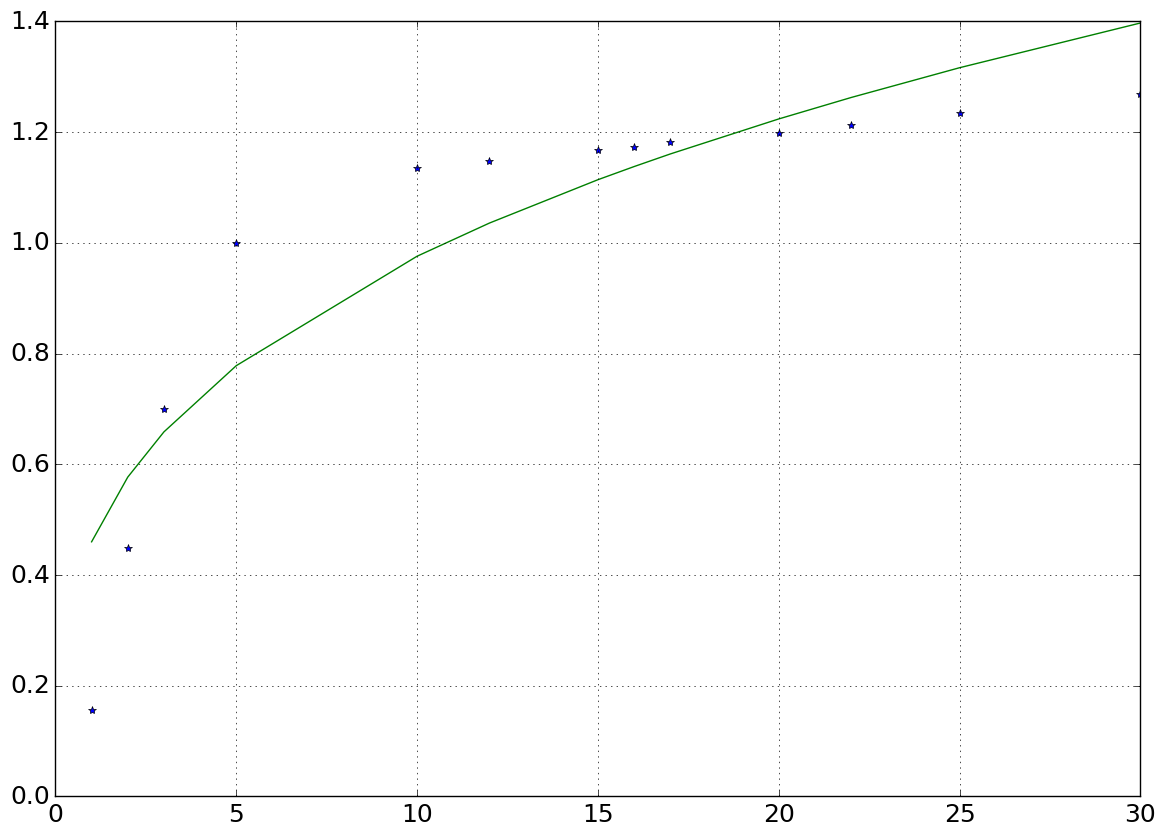

In [138]:
def ff(x,a,b):
    return a*x+b

def fff(x,a,b):
    return np.power(a*np.asarray(x),b)

kb = []
# arcc = np.mean(sino0, axis=0)
# x0 = np.diff(arcc[1:])
x0 = b['5']
rc = []
for k in b.keys():
    y = b[k]
    popt, pcov = curve_fit(ff, np.asarray(x0),np.asarray(y))
    perr  = np.sqrt(np.diag(pcov))
    kb.append(popt)
    rc.append(int(k))
kb = np.asarray(kb)
rc = np.asarray(rc)

plt.figure(figsize=(14,10))
plt.plot(rc, kb[:,0], '*')
plt.grid()

popt, pcov = curve_fit(fff, rc, kb[:,0])
perr  = np.sqrt(np.diag(pcov))

print(popt)
print(perr)

plt.plot(sorted(rc), fff(sorted(rc), popt[0],popt[1]))

In [128]:
rc

array(['10', '12', '15', '22', '17', '16', '30', '1', '3', '2', '5', '25',
       '20'], 
      dtype='|S2')

In [108]:
np.power(2,3)

8

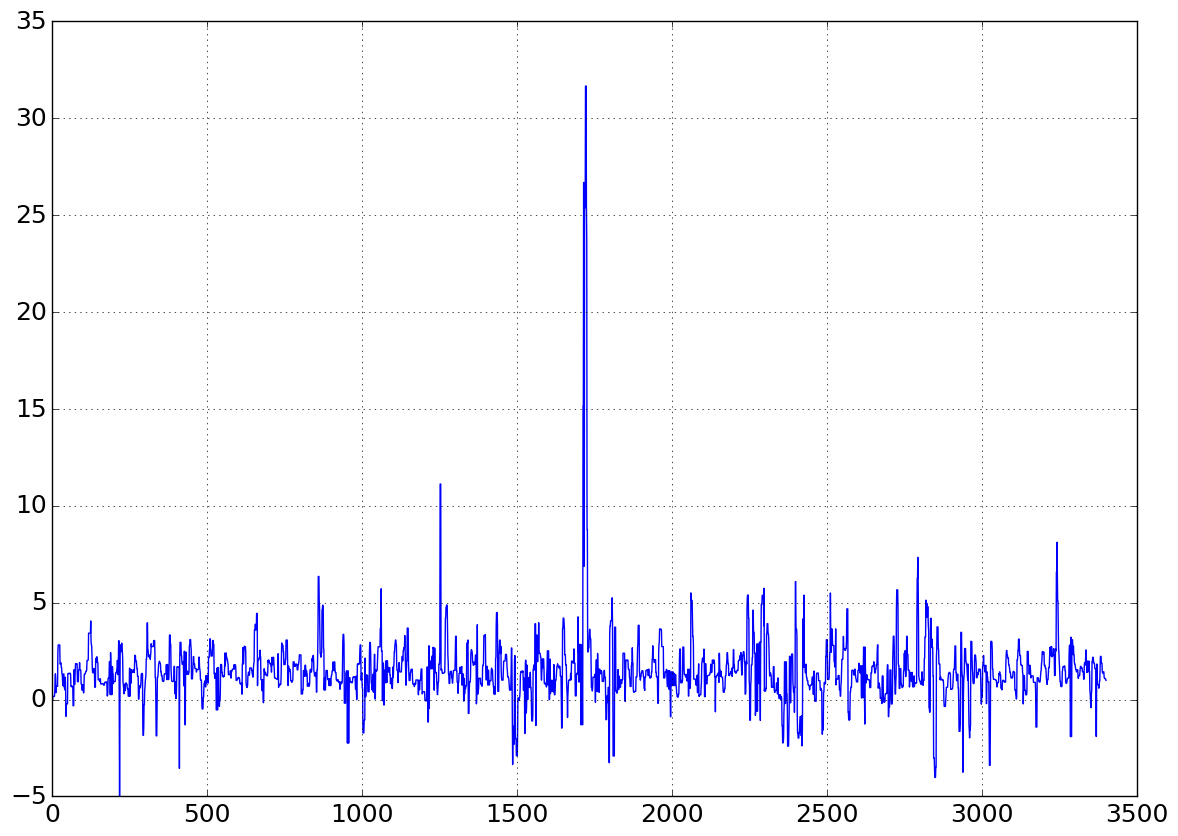

In [142]:
plt.figure(figsize=(14,10))
plt.plot(medfilt(np.divide(b['20'],b['3'])[500:-100],7))
plt.grid(True)

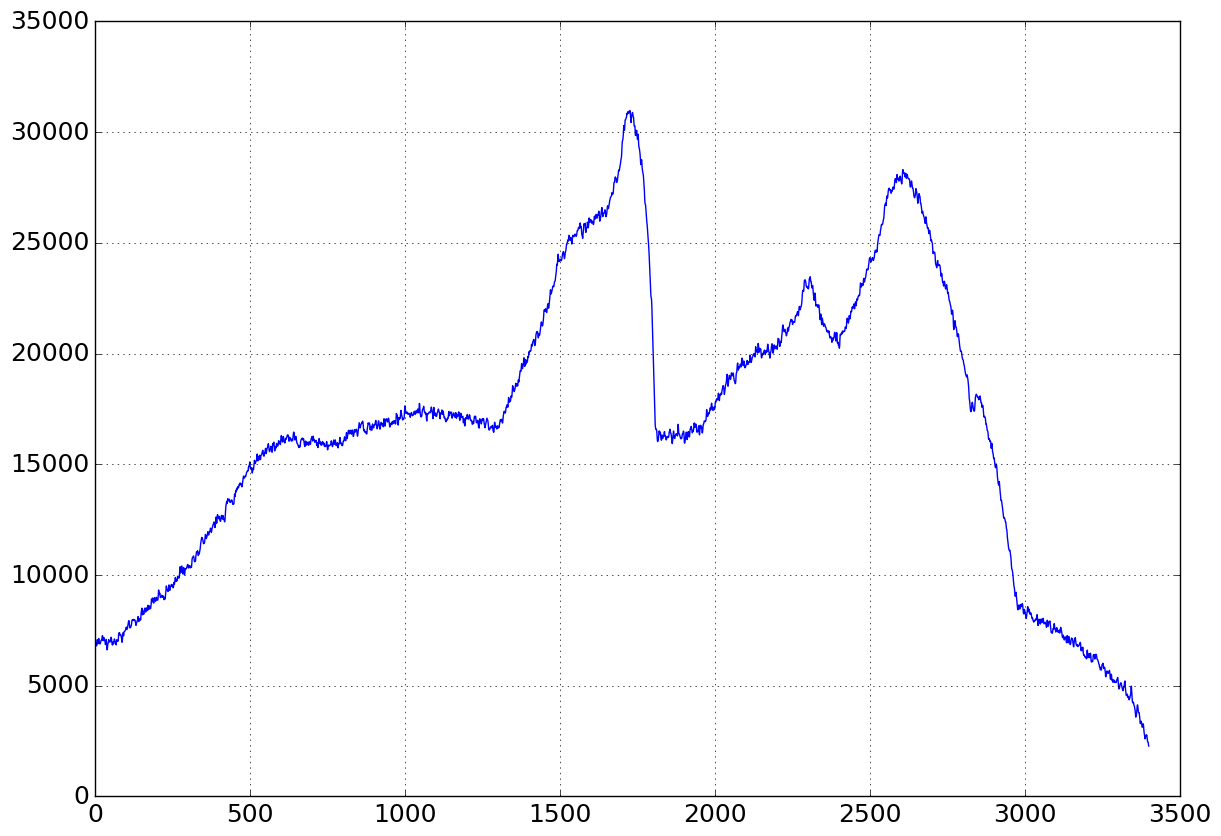

In [120]:
arccc = np.mean(sino0, axis=0)[500:-100]
plt.figure(figsize=(14,10))
plt.plot(arccc)
plt.grid(True)

In [312]:
def build_reconstruction_geomety(detector_size, angles):
    
    # proj_geom = astra.create_proj_geom('parallel', 1.0, detector_size, angles)
    
    #Object to Source (mm) = 56.135
    #Camera to Source (mm) = 225.082
    
    # All distances in [pixels]
    pixel_size = 2.82473e-3
    os_distance = (56.135)/pixel_size
    ds_distance = (225.082)/pixel_size
    
    proj_geom = astra.create_proj_geom('fanflat', ds_distance/os_distance, detector_size, angles,
                                       os_distance, (ds_distance-os_distance))
#     proj_geom = astra.create_proj_geom('parallel', 1, detector_size, angles)
    
    return proj_geom

def astra_tomo2d_fanflat_fbp(sinogram, angles):
    detector_size = sinogram.shape[1]
    

    rec_size = detector_size # size of reconstruction region
    vol_geom = astra.create_vol_geom(rec_size, rec_size)

    proj_geom = build_reconstruction_geomety(detector_size, angles)
    
    sinogram_id = astra.data2d.create('-sino', proj_geom, data=sinogram)
    # Create a data object for the reconstruction
    rec_id = astra.data2d.create('-vol', vol_geom)

    # Set up the parameters for a reconstruction algorithm using the GPU
    cfg = astra.astra_dict('FBP_CUDA')
    cfg['ReconstructionDataId'] = rec_id
    cfg['ProjectionDataId'] = sinogram_id
    cfg['option'] = {}
    cfg['option']['ShortScan'] = True
#     cfg['option']['MinConstraint'] = 0
    # cfg['option']['MaxConstraint'] = 5

    # Available algorithms:
    # SIRT_CUDA, SART_CUDA, EM_CUDA, FBP_CUDA (see the FBP sample)

    # Create the algorithm object from the configuration structure
    alg_id = astra.algorithm.create(cfg)

    # Run 150 iterations of the algorithm
    astra.algorithm.run(alg_id,  1)

    # Get the result
    rec = astra.data2d.get(rec_id)
    # Clean up. Note that GPU memory is tied up in the algorithm object,
    # and main RAM in the data objects.
    astra.algorithm.delete(alg_id)
    astra.data2d.delete(rec_id)
    astra.data2d.delete(sinogram_id)
    astra.clear()
    return rec, proj_geom, cfg

def get_reconstruction(sinogram, reconstruction_function, min_level=None):
    angles = np.arange(sinogram.shape[0])*0.1#-11.493867*2
    angles = angles/180.*np.pi
#     angles = angles-(angles.max()-angles.min())/2
    if min_level is None:
        astra_rec, proj_geom, cfg = reconstruction_function(np.flipud(sinogram), angles)
    else:
        astra_rec, proj_geom, cfg= reconstruction_function(np.flipud(sinogram), angles, min_level)

    astra_rec = np.flipud(astra_rec)
    return astra_rec

def get_reconstruction_fbp(sinogram):
    return get_reconstruction(sinogram, astra_tomo2d_fanflat_fbp)

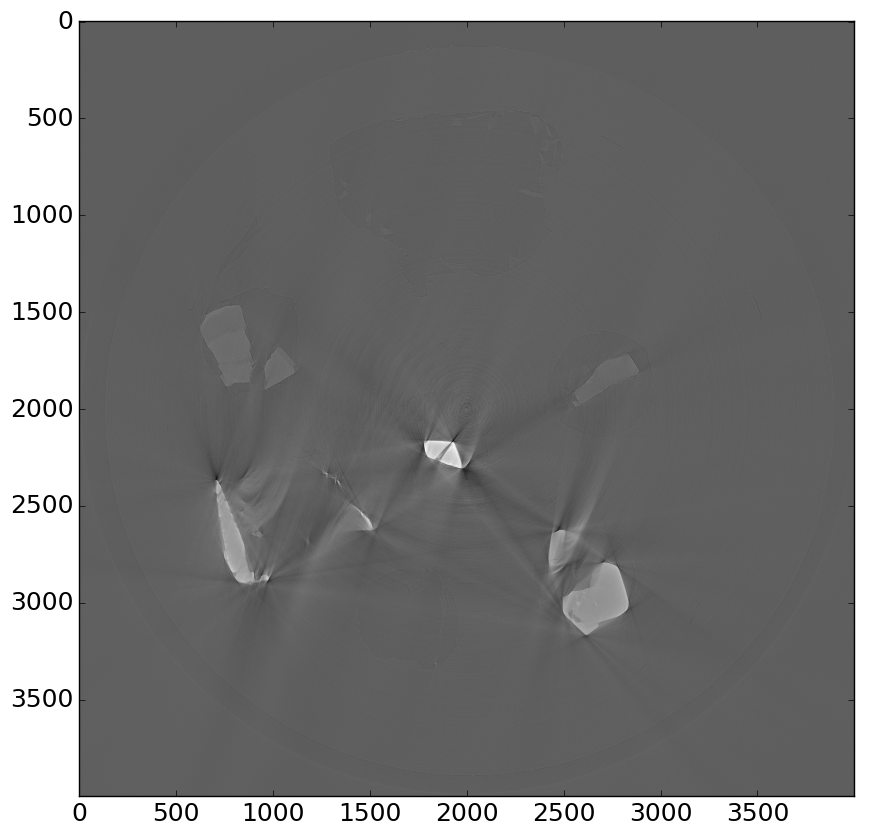

In [324]:
r=get_reconstruction_fbp(sino0)
plt.figure(figsize=(10,15))
# plt.subplot(121)
# plt.imshow(r[1700:2300,1700:2300], cmap=plt.cm.gray)
plt.imshow(r, cmap=plt.cm.gray)
# plt.subplot(122)
# plt.imshow(rec0_bh[1700:2300,1700:2300], cmap=plt.cm.gray)

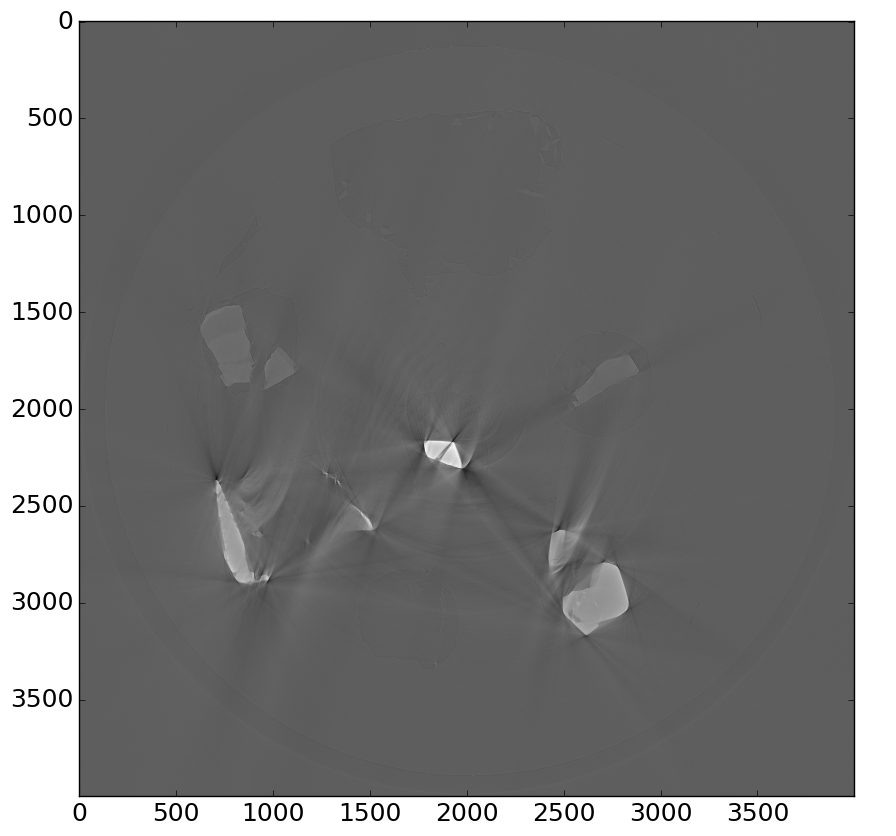

In [323]:
r=get_reconstruction_fbp(sino20)
plt.figure(figsize=(10,15))
# plt.subplot(121)
# plt.imshow(r[1700:2300,1700:2300], cmap=plt.cm.gray)
plt.imshow(r, cmap=plt.cm.gray)
# plt.subplot(122)
# plt.imshow(rec0_bh[1700:2300,1700:2300], cmap=plt.cm.gray)

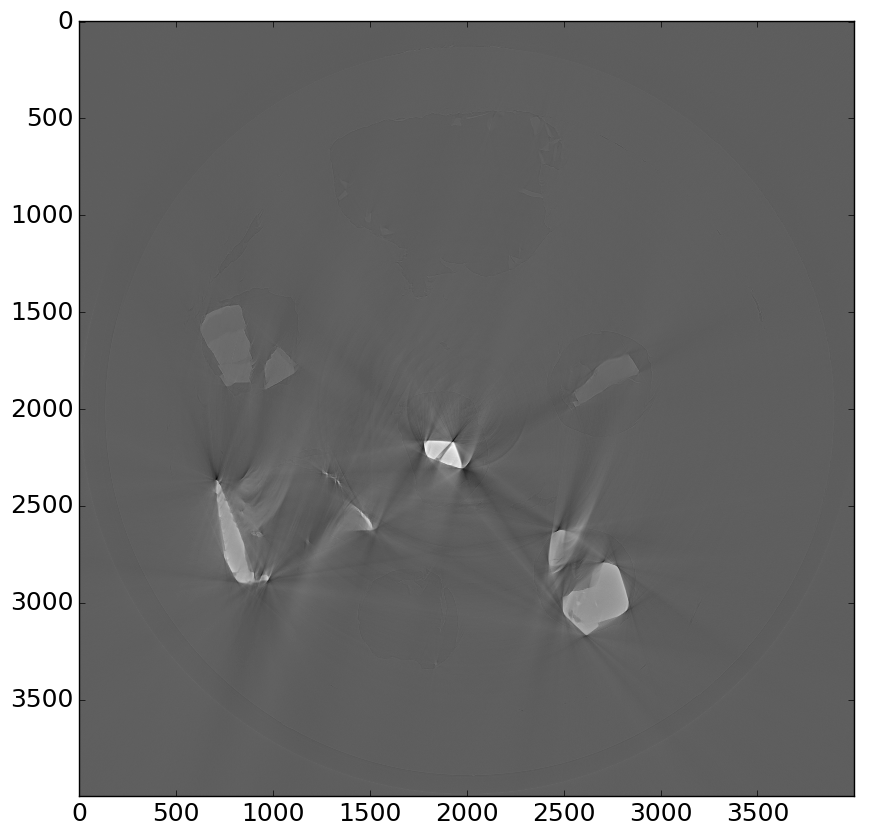

In [322]:
r=get_reconstruction_fbp(my_rc(sino0,20))
plt.figure(figsize=(10,15))
# plt.subplot(121)
# plt.imshow(r[1700:2300,1700:2300], cmap=plt.cm.gray)
plt.imshow(r, cmap=plt.cm.gray)
# plt.subplot(122)
# plt.imshow(rec0_bh[1700:2300,1700:2300], cmap=plt.cm.gray)